# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 5 submission</b></u>

### Roster Name: Benjamin Wu
### Student ID: 013607880
### Email address: benjamin.wu01@sjsu.edu

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [91]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [92]:
np.random.seed(42)

#### Code the solution

In [93]:
df = pd.read_csv("homework5_input_data.csv")

In [94]:
df_nonnum = df.loc[:,["Gender", "Customer Type", "Type of Travel", "Class"]]
df_satis = df.loc[:, "satisfaction"]
df.pop("Gender")
df.pop("Customer Type")
df.pop("Type of Travel")
df.pop("Class")
df.pop("satisfaction")
df_nonnum = pd.get_dummies(df_nonnum)

In [95]:
df = pd.concat([df, df_nonnum], axis=1)

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(df, df_satis, test_size=0.2, random_state=0)

In [97]:
model = DecisionTreeClassifier(random_state=0)
results = cross_val_score(model, X_train, Y_train, cv=5)

print("Individual cross-validation accuracies: " + str(results))
total = 0
for i in results:
    total = total + i
total = total / len(results)

print("Mean cross validation accuracy: {:.5f}".format(total))

Individual cross-validation accuracies: [0.94 0.94 0.94 0.95 0.94]
Mean cross validation accuracy: 0.94354


In [98]:
model.fit(X_train, Y_train)

print('Accuracy of decision tree model on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of decision tree model on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of decision tree model on training set: 1.00
Accuracy of decision tree model on test set: 0.95


C:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[11174   546]
 [  554  8445]]
Normalized confusion matrix
[[0.95 0.05]
 [0.06 0.94]]


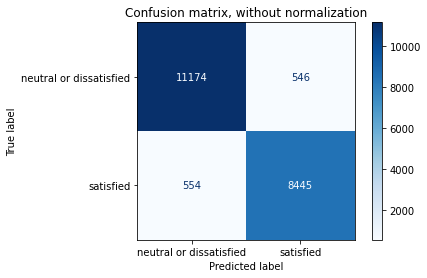

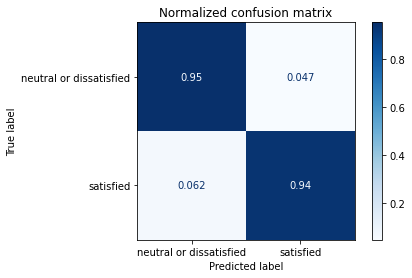

In [99]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=["neutral or dissatisfied", "satisfied"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()